## Testing complex multi body class

In [1]:
import sys
sys.path.append('/Users/sstk4353/packages/.')

#import WIPL_python_analysis.ComplexMultiBody.ComplexMultiBody as cmb
from ComplexMultiBody import ComplexMultiBody as cmb
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


sys.path.append('./')

In [2]:
BASE_DRIVE_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/Bernard_ellipsoid_comparison/'
ELLIPSOIDS = 'multi_moth_outputs/three_ellipsoids/'
BERNARD_BODY = 'multi_moth_outputs/three_bernard_body/'

BERNARD_COMPARISON = 'Bernard/'
ELLIPSOID_COMPARISON = 'Ellipsoid/'

## Set up for single body testing

In [3]:
pol_list = ['H', 'V']
comparison_data_dict = {x: {} for x in pol_list}


for pol in pol_list:
    BODY_PATH = BASE_DRIVE_PATH + BERNARD_COMPARISON + f'parameterised/csv/morpho_analysis/Bernard_parameterised_560_{pol}_M_1000_body_p0_s0_df.csv'
    comparison_data_dict[pol]['Bernard_body'] = pd.read_csv(BODY_PATH)

In [4]:
scatterer_dataset = {
    'H_H' : comparison_data_dict['H']['Bernard_body']['Ephi'],
    'H_V' : comparison_data_dict['H']['Bernard_body']['Etheta'],
    'V_H' : comparison_data_dict['V']['Bernard_body']['Ephi'],
    'V_V' : comparison_data_dict['V']['Bernard_body']['Etheta'],
}

## Load distribution

In [5]:
distribution_df = pickle.load(open('test_cyclinder.pkl', 'rb'))

## Test ComplexMultiBody class single body case

In [6]:
cmb_single = cmb(
    scatterer_dataset=scatterer_dataset,
    frequency=5.6,
    distribution_df=distribution_df,
    )

In [7]:
cmb_single._convert_relative_distances_to_phase_shifts()

In [8]:
cmb_single._extract_single_body_results()

In [9]:
cmb_single._perform_phase_shifts()

In [10]:
cmb_single.calculate_resultant_voltages()

In [11]:
cmb_single._dual_pol_calcs_on_recieved_voltages()

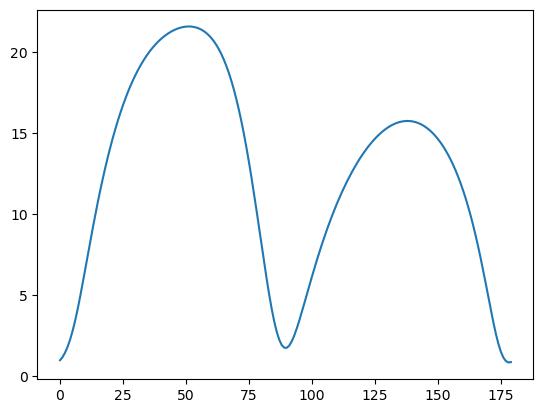

In [14]:
plt.plot(cmb_single.differential_reflectivity)

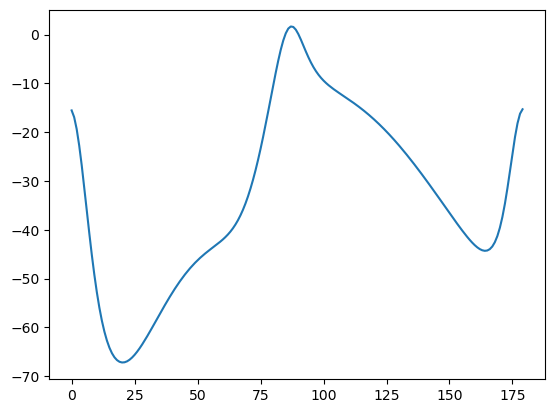

In [15]:
plt.plot(cmb_single.differential_phase)

/Users/sstk4353/miniconda3/envs/WIPL_env2/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/sstk4353/miniconda3/envs/WIPL_env2/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


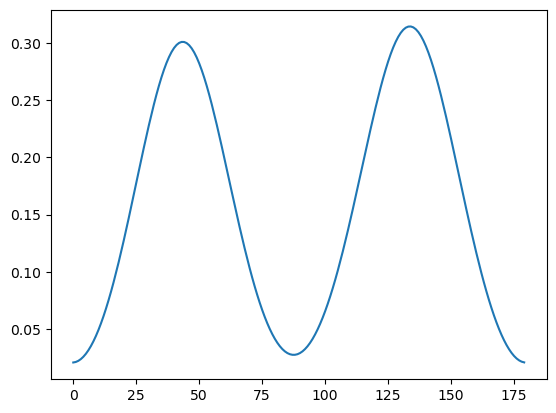

In [16]:
plt.plot(cmb_single.resultant_voltage_phi)

/Users/sstk4353/miniconda3/envs/WIPL_env2/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/sstk4353/miniconda3/envs/WIPL_env2/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


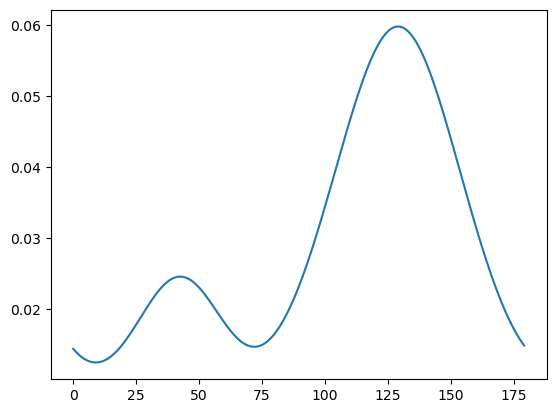

In [17]:
plt.plot(cmb_single.resultant_voltage_theta)


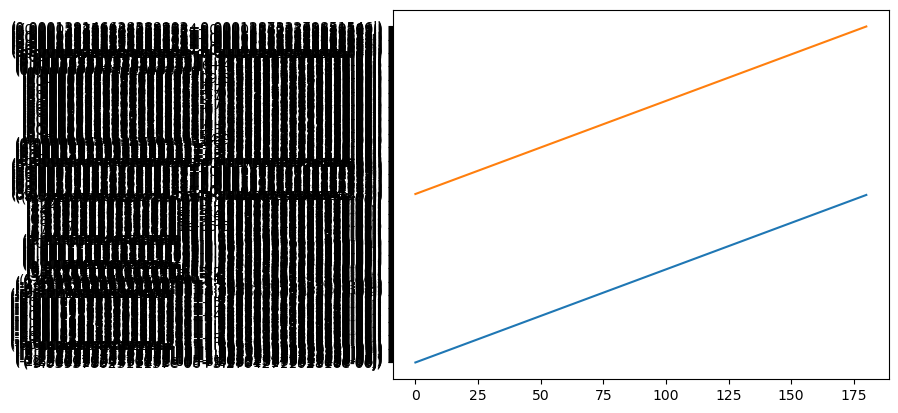

In [ ]:
plt.plot(scatterer_dataset['V_H'], label='H_H')


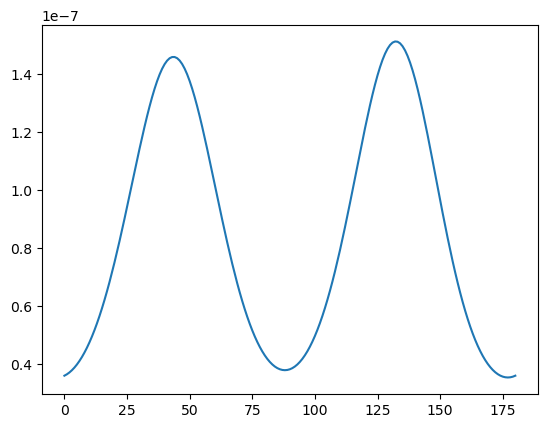

In [23]:
plt.plot(np.abs(np.array(scatterer_dataset['V_V'], dtype=complex))**2)


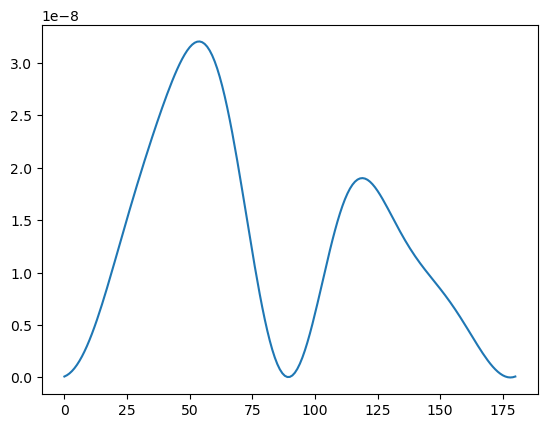

In [24]:
plt.plot(np.abs(np.array(scatterer_dataset['V_H'], dtype=complex))**2)